In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
dfSum = pd.read_csv('/Users/zhangwenlan/Downloads/Tongji_RA/Data/Process/Processed/24hFilter/Processed/Sum.csv')
dfTrueStop = pd.read_csv('/Users/zhangwenlan/Downloads/Tongji_RA/Data/Process/Processed/24hFilter/Processed/TrueStop.csv')

In [4]:
dfSum

,FileID,StopID,Car Plate,StartRow,EndRow,StartTime,EndTime,Duration(min),Time Delta,MeanLat,MeanLon,Distance(m),Location,SpeedBeforePark,TrueStop,Distance,Quantity,TrueStopFixed,CourseChangeTest,Code
0,0.0,0.0,湘A-E2628,0.0,105.0,2017-04-20 15:42:00,2017-04-20 16:34:00,52.0,0.0,28.277568,112.674236,0.000000,"湖南省长沙市宁乡县银洲路,距金腾科技园 约205米,距窑家坡 约258米",0.00,0.0,0.0,0.0,0.0,0.000000,0
1,0.0,1.0,湘A-E2628,107.0,107.0,2017-04-20 16:35:00,2017-04-20 16:35:00,0.0,1.0,28.277489,112.675189,93.906619,"湖南省长沙市宁乡县金水路,距金腾科技园 约238米,距龙桥安置区 约257米",2.75,0.0,0.0,0.0,0.0,5.004585,0
2,0.0,2.0,湘A-E2628,120.0,179.0,2017-04-20 16:41:00,2017-04-20 17:11:00,30.0,6.0,28.277603,112.655293,1952.011465,"湖南省长沙市宁乡县金沙路,距罗家塘 约97米,距长沙服装工业学校 约326米",11.35,0.0,0.0,0.0,0.0,126.455860,0
3,0.0,3.0,湘A-E2628,248.0,295.0,2017-04-20 17:45:00,2017-04-20 18:09:00,24.0,34.0,28.527536,112.448470,34322.066220,"湖南省益阳市赫山区,距汤家湾 约106米,距红旗驾校 约320米",48.55,0.0,0.0,0.0,0.0,157.605711,0
4,0.0,4.0,湘A-E2628,379.0,410.0,2017-04-20 18:50:00,2017-04-20 19:06:00,16.0,41.0,28.773333,111.993488,52160.194700,"湖南省常德市汉寿县,距新屋冲 约184米,距胜文冲 约413米",30.45,0.0,0.0,0.0,0.0,179.431212,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41580,58.0,585.0,湘A-E2547,37435.0,37435.0,2017-06-21 18:27:59,2017-06-21 18:27:59,0.0,11.0,40.796168,111.537966,3322.739287,"内蒙古自治区呼和浩特市土默特左旗G110(京银线),距溪峰幼儿园 约164米,距聚龙湾-7号...",9.15,0.0,0.0,0.0,0.0,164.923524,0
41581,58.0,586.0,湘A-E2547,37438.0,37438.0,2017-06-21 18:30:46,2017-06-21 18:30:46,0.0,2.0,40.798795,111.543508,551.225985,"内蒙古自治区呼和浩特市土默特左旗G110(京银线),距启蒙幼儿园 约127米,距呼和浩特市绕...",5.45,0.0,0.0,0.0,0.0,155.462261,0
41582,58.0,587.0,湘A-E2547,37558.0,37587.0,2017-06-21 20:35:00,2017-06-21 21:07:00,32.0,124.0,40.919538,112.752448,102807.872823,"内蒙古自治区乌兰察布市卓资县,距东营子村 约754米",29.90,0.0,0.0,0.0,0.0,109.355548,0
41583,58.0,588.0,湘A-E2547,37670.0,37670.0,2017-06-21 22:32:37,2017-06-21 22:32:37,0.0,85.0,40.397198,113.102918,65137.864533,内蒙古自治区乌兰察布市丰镇市,43.55,0.0,0.0,0.0,0.0,172.719022,0


<AxesSubplot:xlabel='Duration(min)', ylabel='Count'>

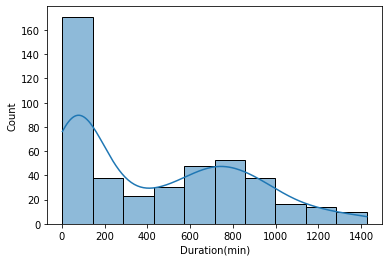

In [5]:
sns.histplot(data=dfTrueStop, x='Duration(min)', kde=True)

<AxesSubplot:xlabel='Duration(min)', ylabel='Count'>

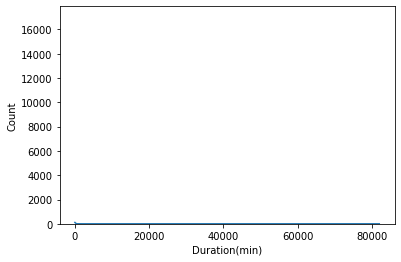

In [6]:
sns.histplot(x='Duration(min)', data=dfSum, kde=True)

In [7]:
data = dfTrueStop['Duration(min)']
print(st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)))

(411.1389263214553, 485.2510963542817)


In [19]:
dfTrueStopRP = pd.read_csv('/Users/zhangwenlan/Downloads/Tongji_RA/Data/Process/Processed/9RPoints/Processed/TrueStop.csv')
dfSumRP = pd.read_csv('/Users/zhangwenlan/Downloads/Tongji_RA/Data/Process/Processed/9RPoints/Processed/Sum.csv')

In [17]:
dfTrueStopRP

,FileID,StopID,Car Plate,StartRow,EndRow,StartTime,EndTime,Duration(min),Time Delta,MeanLat,MeanLon,Distance(m),Location,SpeedBeforePark,TrueStop,Distance,Quantity,TrueStopFixed,CourseChangeTest,500m
0,0.0,49.0,湘A-E2628,4245.0,4273.0,2017-04-23 06:13:00,2017-04-23 06:41:00,28.0,4.0,41.723814,125.951736,370.155809,"吉林省通化市东昌区江沿路,距广电大厦 约197米,距通化市广电局 约197米",8.65,0.0,39.912526,0.0,1.0,41.314714,4
1,0.0,60.0,湘A-E2628,4598.0,6105.0,2017-04-23 12:09:00,2017-04-24 13:19:00,1510.0,4.0,42.546775,125.690738,79.574247,"吉林省通化市梅河口市,距梅河口站 约708米,距铁北天怡小区1051号楼 约323米",4.75,1.0,24.956926,750.0,1.0,86.423909,5
2,0.0,259.0,湘A-E2628,19799.0,19811.0,2017-05-04 22:54:00,2017-05-04 23:00:00,6.0,1.0,28.205063,113.030345,130.387689,"湖南省长沙市芙蓉区金泉街65,距兴湘国际商务大酒店 约86米,距中国工商银行(马王堆支行) ...",9.50,1.0,118.169817,750.0,1.0,133.467897,3
3,1.0,47.0,湘A-A0355,5668.0,6567.0,2017-05-01 19:34:00,2017-05-02 10:34:00,900.0,2.0,42.252998,123.816195,30.228594,"辽宁省铁岭市银州区G102(京哈线),距盛隆钢材交易市场 约115米,距辽宁省铁岭大豆科学研...",2.45,1.0,10.624587,750.0,1.0,127.640565,5
4,1.0,260.0,湘A-A0355,24964.0,26240.0,2017-05-31 22:30:00,2017-06-01 09:10:00,640.0,1.0,27.842165,112.910318,73.011037,"湖南省湘潭市岳塘区顺江路,距桐塘 约120米,距伞铺岭 约250米",5.30,1.0,31.203711,50.0,1.0,19.423499,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,55.0,12.0,湘A-57400,1207.0,1502.0,2017-04-27 22:28:05,2017-04-28 12:12:06,824.0,5.0,28.205076,113.029730,891.815516,"湖南省长沙市芙蓉区紫薇路36号,距湖南省金属回收公司-宿舍 约44米,距女人花名妆(紫薇路店...",17.50,1.0,175.936984,750.0,1.0,25.757860,14
154,55.0,31.0,湘A-57400,2418.0,2477.0,2017-05-03 20:57:28,2017-05-03 22:41:03,103.0,2.0,28.204987,113.030350,300.457636,"湖南省长沙市芙蓉区金泉街65,距苏南制冷 约53米,距长沙市芙蓉区火星幼儿园 约88米",11.50,1.0,120.783357,750.0,1.0,107.941337,14
155,55.0,190.0,湘A-57400,13849.0,14316.0,2017-06-06 22:39:02,2017-06-07 22:05:20,1406.0,1.0,28.205145,113.030045,85.667007,"湖南省长沙市芙蓉区紫薇路48,距兴湘国际商务大酒店 约69米,距湖南省金属回收公司-宿舍 约71米",5.50,1.0,144.092909,750.0,1.0,46.623891,14
156,55.0,242.0,湘A-57400,17956.0,18017.0,2017-06-15 21:36:29,2017-06-15 22:53:45,77.0,1.0,28.205107,113.030300,109.877366,"湖南省长沙市芙蓉区金泉街65,距苏南制冷 约67米,距兴湘国际商务大酒店 约80米",8.00,1.0,120.864668,750.0,1.0,53.707799,14


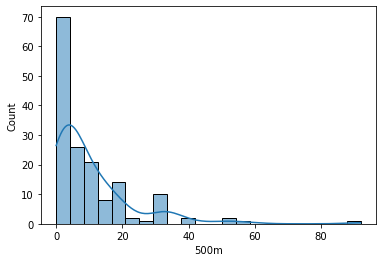

In [18]:
sns.histplot(data = dfTrueStopRP, x='500m', kde=True)

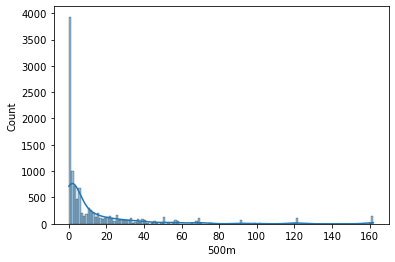

In [20]:
sns.histplot(data = dfSumRP, x='500m', kde=True)

In [22]:
data = dfTrueStopRP['500m']
print(st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)))

(8.351475387571568, 12.408018283314508)


In [ ]:
# Multiple Categories
sns.histplot(data = score_data
            ,x = 'score'
            ,alpha = .7
            ,hue = 'group'
            )